In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import tensorflow as tf
import pickle
import os

In [2]:
import dataset_utils
from glob import glob

In [3]:
DATA_DIR = "3_class_data"
NUM_POINTS = 100
NUM_CLASSES = 3
BATCH_SIZE = 32
train_points, test_points, train_labels, test_labels, CLASS_MAP = dataset_utils.parse_dataset(NUM_POINTS, DATA_DIR)

processing class: walking
processing class: jumping
processing class: speedwalking


In [4]:
print(train_points)

[[[ 6.528e-01  2.433e-01  7.158e-01 -3.757e-01  2.610e+02]
  [ 5.054e-01  3.289e-01  2.605e-01 -3.757e-01  2.240e+02]
  [ 9.292e-01  2.595e-01  1.000e+00 -1.252e-01  2.550e+02]
  ...
  [ 1.000e+00  3.704e-01  1.483e-01 -3.757e-01  1.680e+02]
  [ 4.143e-01  4.404e-01  8.823e-01 -5.010e-01  3.270e+02]
  [ 1.086e-01  5.029e-01  6.919e-01 -5.010e-01  3.060e+02]]

 [[ 9.292e-01  0.000e+00  8.394e-01  0.000e+00  2.340e+02]
  [ 3.125e-01  6.812e-01  5.933e-01 -5.010e-01  3.260e+02]
  [ 0.000e+00  5.107e-01  6.016e-01 -6.260e-01  2.840e+02]
  ...
  [ 8.850e-02  5.488e-01  6.421e-01 -3.757e-01  2.610e+02]
  [ 8.154e-01  6.488e-02  8.345e-01 -1.252e-01  2.890e+02]
  [ 3.732e-02  3.999e-01  7.144e-01 -3.757e-01  2.700e+02]]

 [[ 8.459e-02  7.588e-01  7.954e-01 -5.010e-01  2.340e+02]
  [ 9.062e-01  7.507e-02  9.458e-01 -3.757e-01  3.440e+02]
  [ 6.621e-01  1.895e-01  9.048e-01 -3.757e-01  2.560e+02]
  ...
  [ 6.088e-02  1.515e-01  9.229e-01 -6.260e-01  1.940e+02]
  [ 6.621e-01  7.617e-01  7.671e-0

In [5]:
print(test_points)

[[[ 3.3496e-01  4.4189e-01  3.4766e-01 -1.2524e-01  1.5700e+02]
  [ 2.4866e-01  7.9688e-01  1.1359e-01 -5.0098e-01  2.2100e+02]
  [ 2.1167e-01  2.3218e-01  4.0771e-01 -1.2524e-01  2.4100e+02]
  ...
  [ 2.1167e-01  4.8389e-01  5.6738e-01 -2.5049e-01  2.9900e+02]
  [ 5.3467e-01  3.0273e-01  8.2031e-01 -1.2524e-01  2.8900e+02]
  [ 4.3182e-02  2.6465e-01  5.0830e-01 -2.5049e-01  3.0200e+02]]

 [[ 9.6777e-01  1.0000e+00  8.8623e-01 -2.5049e-01  3.4200e+02]
  [ 4.3182e-02  2.6465e-01  5.0830e-01 -2.5049e-01  3.0200e+02]
  [ 7.5146e-01  9.7778e-02  4.6118e-01  0.0000e+00  1.3900e+02]
  ...
  [ 2.1167e-01  2.3218e-01  4.0771e-01 -1.2524e-01  2.4100e+02]
  [ 3.9941e-01  6.8945e-01  8.0322e-02 -3.7573e-01  1.5300e+02]
  [ 3.7646e-01  3.9600e-01  8.1726e-02  1.2524e-01  1.6000e+02]]

 [[ 3.3496e-01  2.9907e-01  2.6050e-01  0.0000e+00  1.3900e+02]
  [ 1.0000e+00  8.6963e-01  4.0918e-01 -2.5049e-01  3.5700e+02]
  [ 4.6387e-01  7.2363e-01  2.5314e-02 -3.7573e-01  1.7100e+02]
  ...
  [ 2.4048e-01  3.

In [6]:
# train_points = train_points[:, :, :3]
# test_points = test_points[:, :, :3]
print(CLASS_MAP)

{0: 'walking', 1: 'jumping', 2: 'speedwalking'}


In [7]:
print(train_points)

[[[ 6.528e-01  2.433e-01  7.158e-01 -3.757e-01  2.610e+02]
  [ 5.054e-01  3.289e-01  2.605e-01 -3.757e-01  2.240e+02]
  [ 9.292e-01  2.595e-01  1.000e+00 -1.252e-01  2.550e+02]
  ...
  [ 1.000e+00  3.704e-01  1.483e-01 -3.757e-01  1.680e+02]
  [ 4.143e-01  4.404e-01  8.823e-01 -5.010e-01  3.270e+02]
  [ 1.086e-01  5.029e-01  6.919e-01 -5.010e-01  3.060e+02]]

 [[ 9.292e-01  0.000e+00  8.394e-01  0.000e+00  2.340e+02]
  [ 3.125e-01  6.812e-01  5.933e-01 -5.010e-01  3.260e+02]
  [ 0.000e+00  5.107e-01  6.016e-01 -6.260e-01  2.840e+02]
  ...
  [ 8.850e-02  5.488e-01  6.421e-01 -3.757e-01  2.610e+02]
  [ 8.154e-01  6.488e-02  8.345e-01 -1.252e-01  2.890e+02]
  [ 3.732e-02  3.999e-01  7.144e-01 -3.757e-01  2.700e+02]]

 [[ 8.459e-02  7.588e-01  7.954e-01 -5.010e-01  2.340e+02]
  [ 9.062e-01  7.507e-02  9.458e-01 -3.757e-01  3.440e+02]
  [ 6.621e-01  1.895e-01  9.048e-01 -3.757e-01  2.560e+02]
  ...
  [ 6.088e-02  1.515e-01  9.229e-01 -6.260e-01  1.940e+02]
  [ 6.621e-01  7.617e-01  7.671e-0

In [8]:
from tensorflow import data as tf_data
import keras
import PointNET

keras.utils.set_random_seed(seed=42)

In [9]:
train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(PointNET.augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [10]:
import keras
import tensorflow as tf
from keras import ops
from keras import layers
from PointNET import tnet, conv_bn, dense_bn

In [11]:
inputs = keras.Input(shape=(NUM_POINTS, 5))

x = tnet(inputs, 5)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 5)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 100, 32)   │        192 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 100, 32)   │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 64)   │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 100, 512)  │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 25)        │      3,225 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 5, 5)      │          0 │ dense_2[0][0]   

 Total params: 750,268 (2.86 MB)

 Trainable params: 744,188 (2.84 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [12]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 65.1563 - sparse_categorical_accuracy: 0.3713 - val_loss: 36.3618 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 43.6597 - sparse_categorical_accuracy: 0.5074 - val_loss: 31.8070 - val_sparse_categorical_accuracy: 0.5625
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 38.4502 - sparse_categorical_accuracy: 0.5700 - val_loss: 29.0262 - val_sparse_categorical_accuracy: 0.5625
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 37.5312 - sparse_categorical_accuracy: 0.6472 - val_loss: 28.2359 - val_sparse_categorical_accuracy: 0.6042
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 37.1356 - sparse_categorical_accuracy: 0.7265 - val_loss: 28.9676 - val_sparse_categorical_accuracy: 0.6667
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 37.1726 - sparse_categorical_accuracy: 0.7301 - val_loss: 28.3997 - val_sparse_categorical_accuracy: 0.5833
Epoch 7/3

In [13]:
from matplotlib import pyplot as plt

2024-08-13 15:47:54.916667: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
[[[ 1.0000e+00  1.0201e-02  8.0420e-01 -2.5049e-01  2.2700e+02]
  [ 1.2311e-01  6.6650e-01  6.2646e-01  7.5146e-01  2.8900e+02]
  [ 0.0000e+00  7.4219e-01  3.8354e-01  7.5146e-01  2.3100e+02]
  ...
  [ 3.5010e-01  7.3145e-01  7.2510e-01 -2.5049e-01  2.2800e+02]
  [ 2.5903e-01  2.4597e-01  0.0000e+00  7.5146e-01  2.0600e+02]
  [ 8.5498e-01  3.0615e-01  7.9199e-01 -2.5049e-01  2.1700e+02]]

 [[ 3.6230e-01  2.7808e-01  9.5898e-01 -5.0098e-01  2.2200e+02]
  [ 2.7490e-01  2.3718e-01  1.8799e-01 -6.2598e-01  2.0100e+02]
  [ 7.6562e-01  5.9814e-02  6.4795e-01 -8.7646e-01  3.4100e+02]
  ...
  [ 4.7241e-01  2.3315e-01  7.6709e-01 -6.2598e-01  3.4000e+02]
  [ 7.5049e-01  2.2974e-01  4.5605e-01 -1.0020e+00  2.0100e+02]
  [ 5.8887e-01  7.6270e-01  0.0000e+00  7.5146e-01  2.2400e+02]]

 [[ 1.5222e-01  0.0000e+00  6.2451e-01  6.2598e-01  3.4100e+02]
  [ 4.2700e-01  0.0000e+00  6.5820e-01 -1.0020e+00  1.9500e+02]
  [ 4.6143e-01  5.0635e-01  6.4355e-01 -5.0098e-0

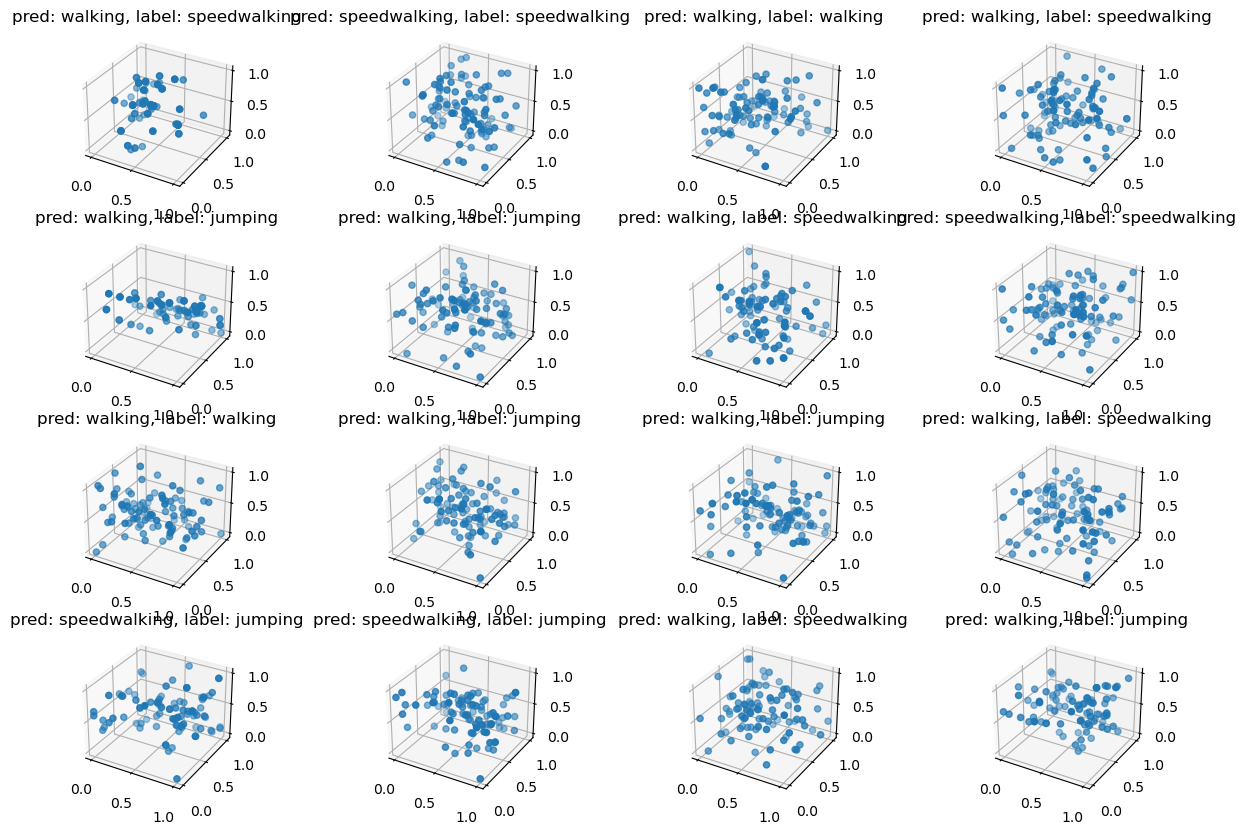

In [14]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:20, ...]
labels = labels[:20, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_on()
plt.show()

In [17]:
predictions = []

# Calculate the number of sections, ensure it's at least 1
num_sections = max(1, len(test_points) // NUM_POINTS)

for batch in np.array_split(test_points, num_sections): 
    preds = model.predict(batch)
    preds = np.argmax(preds, axis=-1)
    predictions.extend(preds)

predictions = np.array(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


In [18]:
accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 45.00%


In [18]:
model.save('pointnet_2_class_data_5_dims.h5', save_format='h5')
# model.get_config()

NotImplementedError: <PointNET.OrthogonalRegularizer object at 0x3108f52d0> does not implement get_config()